## ARBOL DE DECISION ANALISIS

In [135]:
#importar las librerias
!pip install pandas
!pip install pandas scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [50]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
data.shape

(1599, 12)

In [54]:
#Estadistica descriptiva
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [56]:
#informacion general
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


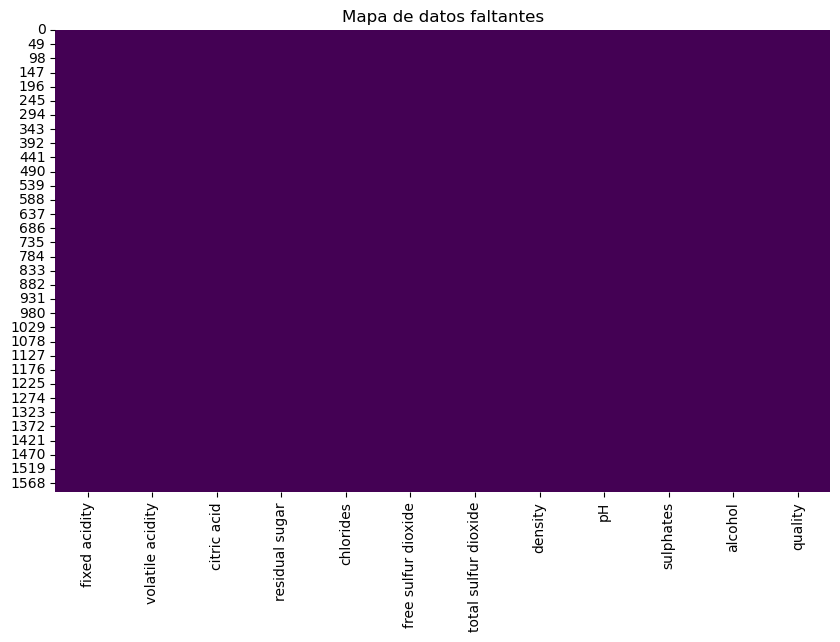

In [58]:
#visualizar datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar= False, cmap="viridis") 
plt.title("Mapa de datos faltantes")
plt.show()

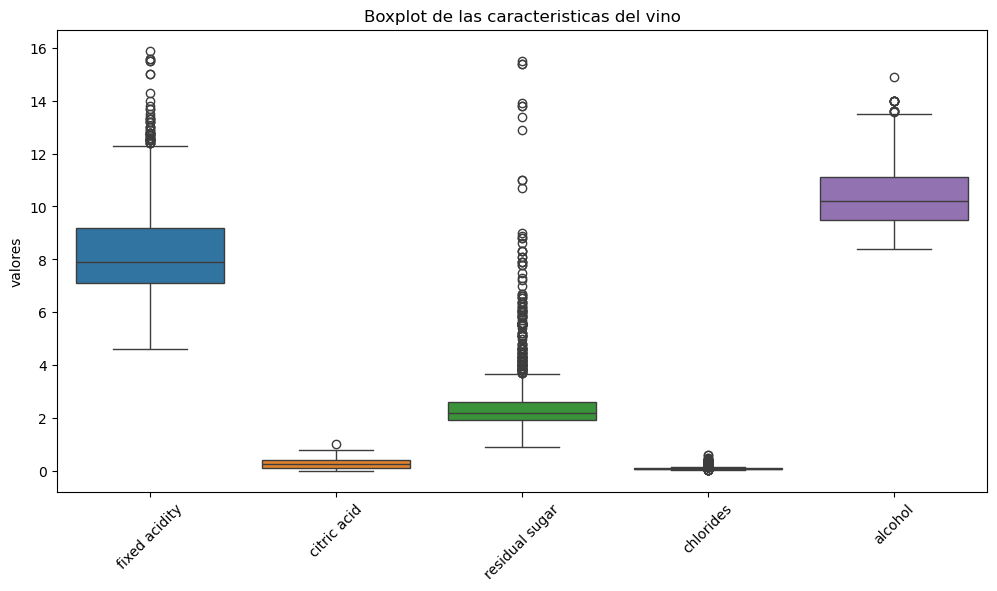

In [60]:
#valores atipicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'alcohol']])
plt.xticks(rotation =45)
plt.title("Boxplot de las caracteristicas del vino")
plt.ylabel("valores")
plt.show()

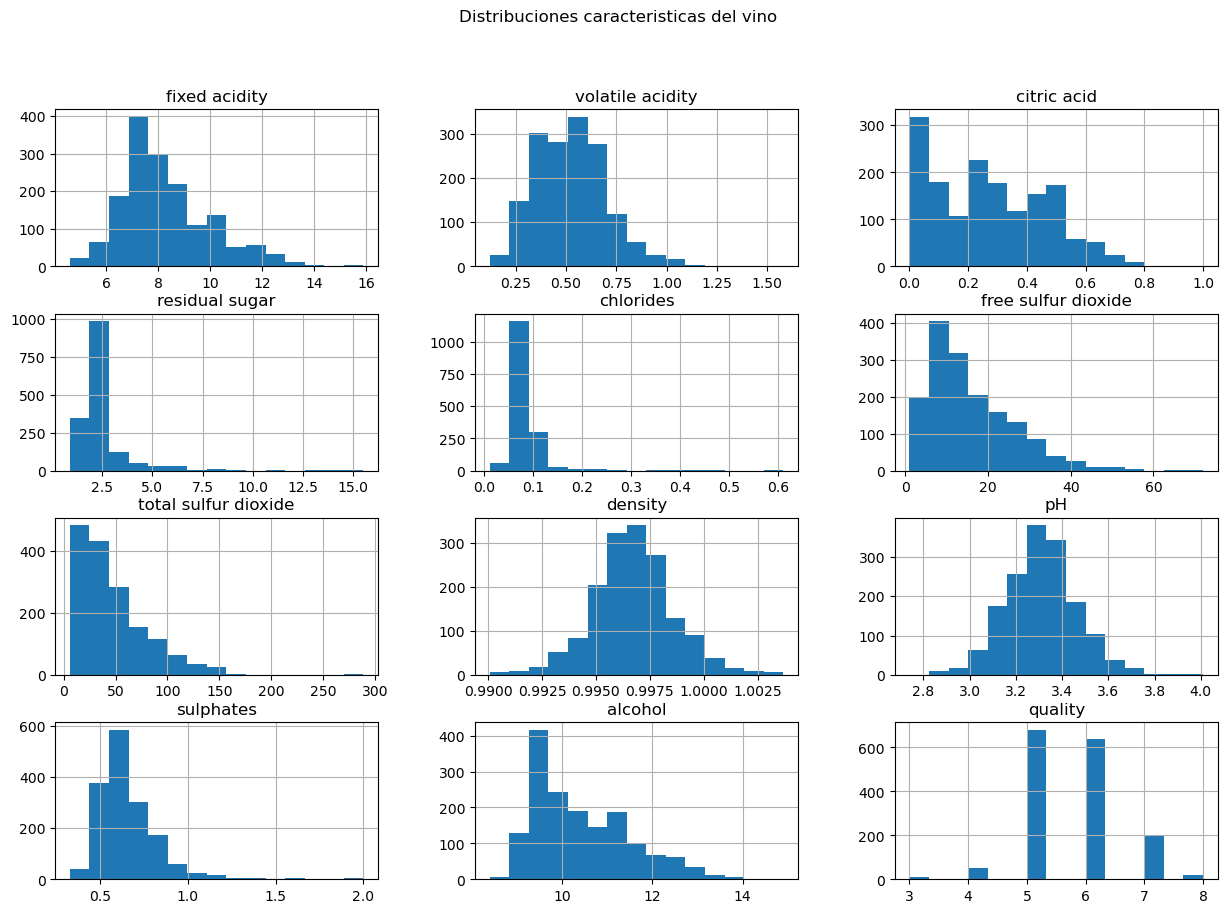

In [62]:
#Histograma para cada caracteristica
data.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Distribuciones caracteristicas del vino")
plt.show()

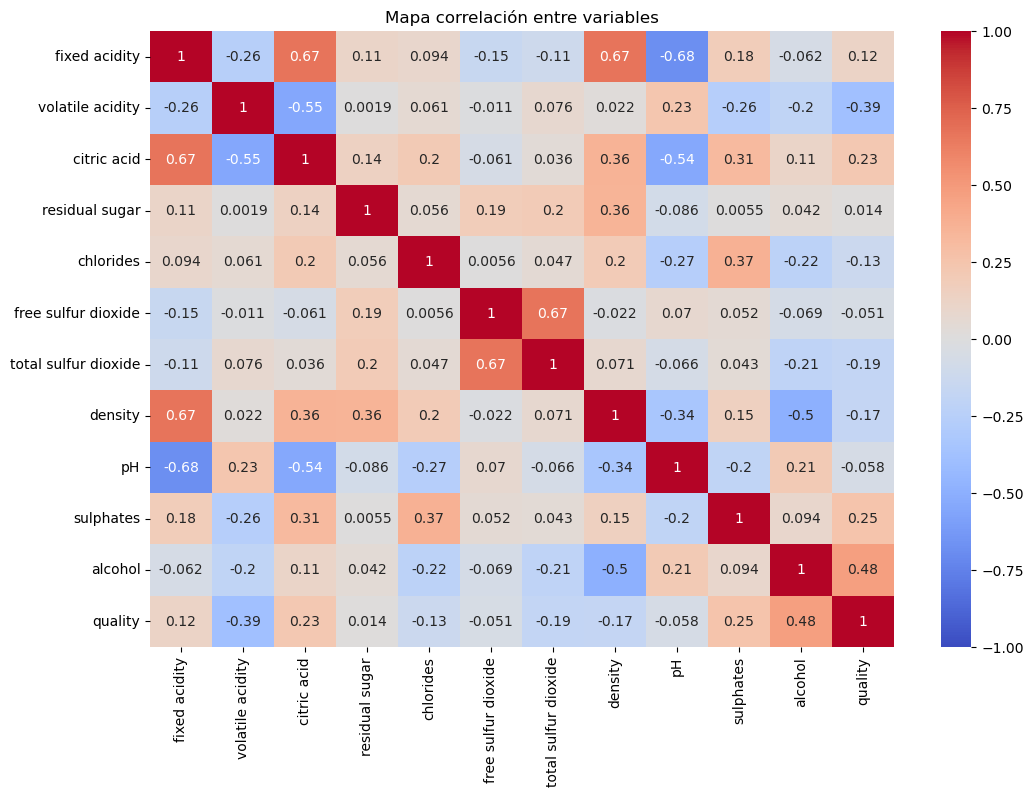

In [20]:
#Mapa de la correlacion entre las variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa correlación entre variables")
plt.show()

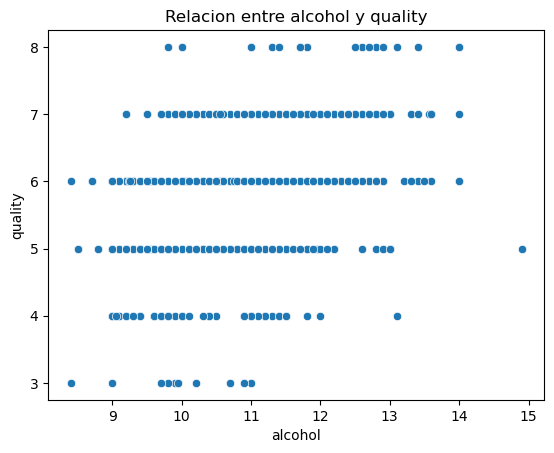

In [64]:
#Grafico entre alcohol y quality
sns.scatterplot(x='alcohol', y='quality', data=data)
plt.title("Relacion entre alcohol y quality")
plt.show()

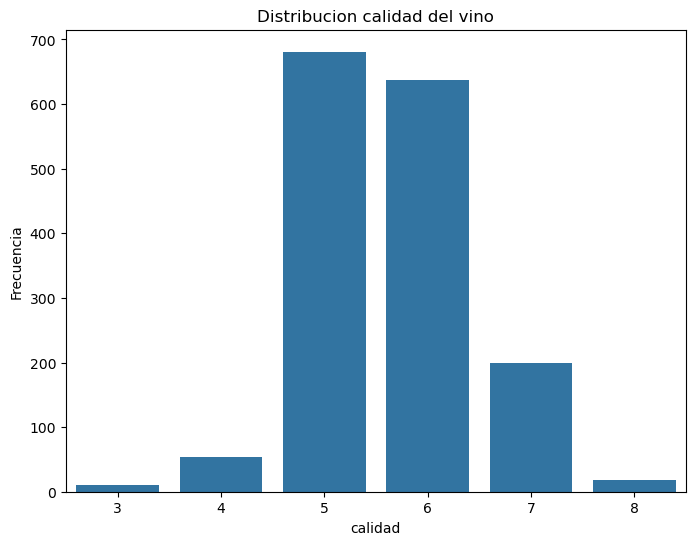

In [66]:
#Histograma variable
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title("Distribucion calidad del vino")
plt.xlabel("calidad")
plt.ylabel("Frecuencia")
plt.show()

In [68]:
#Valores faltantes
print (data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [70]:
#Limites del IQR
for column in data.select_dtypes(include=['float64','int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-1.5 * IQR
    upper_bound = Q3+1.5 * IQR
    data = data[(data[column]>= lower_bound) & (data[column]<=upper_bound)]

In [72]:
#Escalado de los datos media o desviacion
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
data_Scaled=scaler.fit_transform(data)
scaler = MinMaxScaler()
data_scaled= scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)

In [117]:
x = data.drop('alcohol', axis=1)
y = data['quality']

In [153]:
#Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [208]:
# Revisar datos
print(df.head())
print(df.info())

# Separar características y etiquetas
X = df.drop('pH', axis=1)
y = df['quality']

# Comprobar valores nulos
print(X.isnull().sum())
print(y.isnull().sum())

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [210]:
# Crear el modelo
model = DecisionTreeClassifier(random_state=42)

try:
    model.fit(X_train, y_train)
    print("Modelo entrenado correctamente.")
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Convertir las clases únicas a una lista de cadenas
class_names = [str(cls) for cls in y.unique()]

Modelo entrenado correctamente.


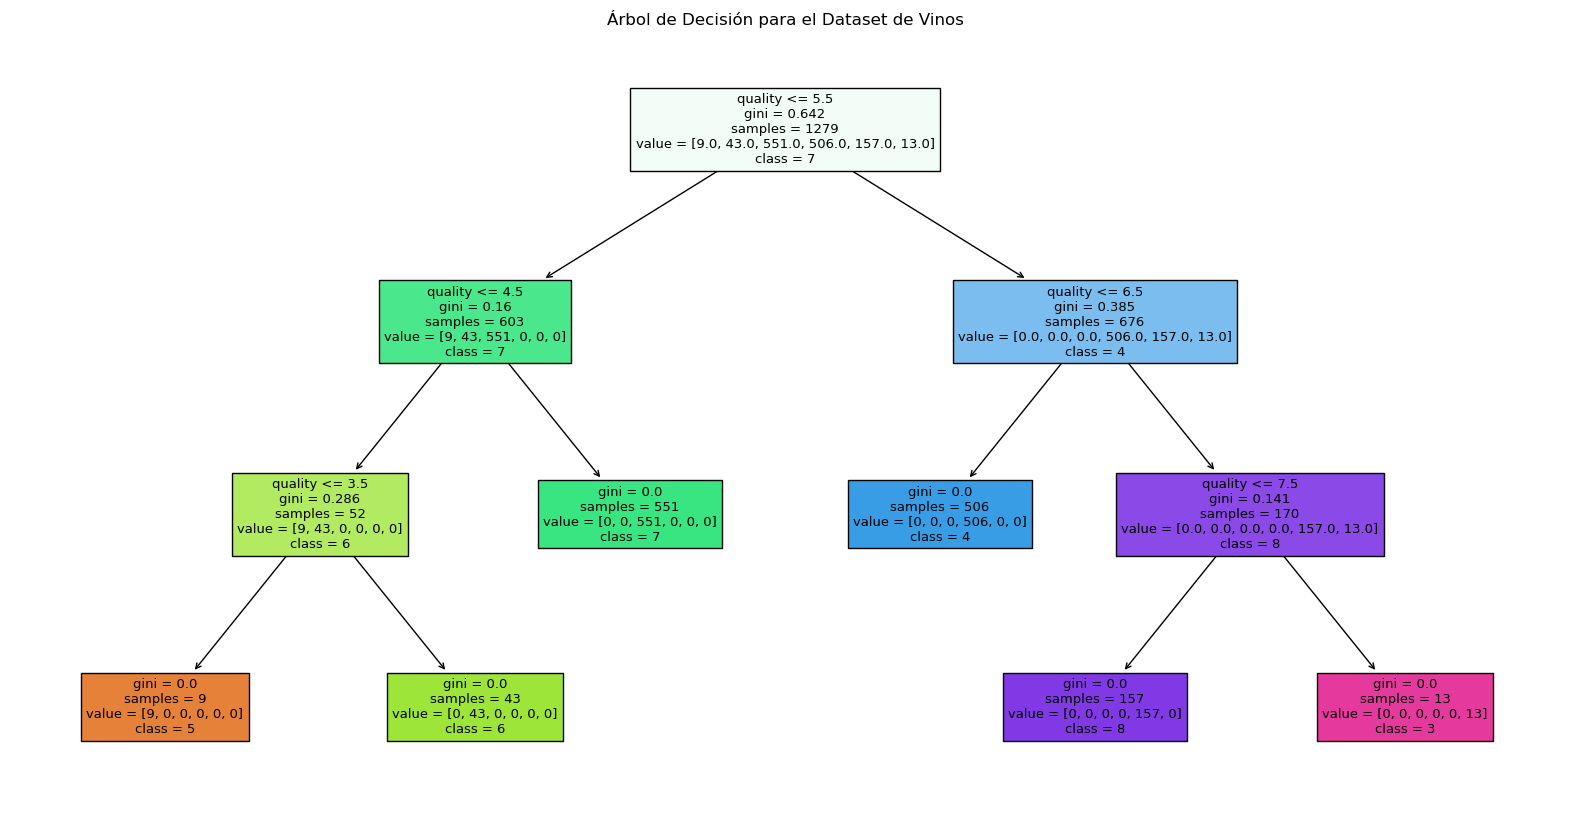

Importancia de las características:
quality                 1.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
sulphates               0.0
alcohol                 0.0
dtype: float64


In [212]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Árbol de Decisión para el Dataset de Vinos")
plt.show()

# importancia de las características
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Importancia de las características:")
print(feature_importance)

In [218]:
#Prediccion de la precision del modelo
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision del modelo: {accuracy:.2f}")

Precision del modelo: 1.00


In [220]:
#Precision con hiperparametros
model = DecisionTreeClassifier(max_depth=8, min_samples_split=6, min_samples_leaf=3, max_features="sqrt", random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"precision con hiperparametros configurados: {accuracy:.2f}")


precision con hiperparametros configurados: 0.95


In [249]:
from sklearn.model_selection import GridSearchCV

# Definir los valores a probar para cada hiperparámetro
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]}
best_model = grid_search.best_estimator_

# Conjunto de prueba
y_pred = best_model.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00       132
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00         5

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



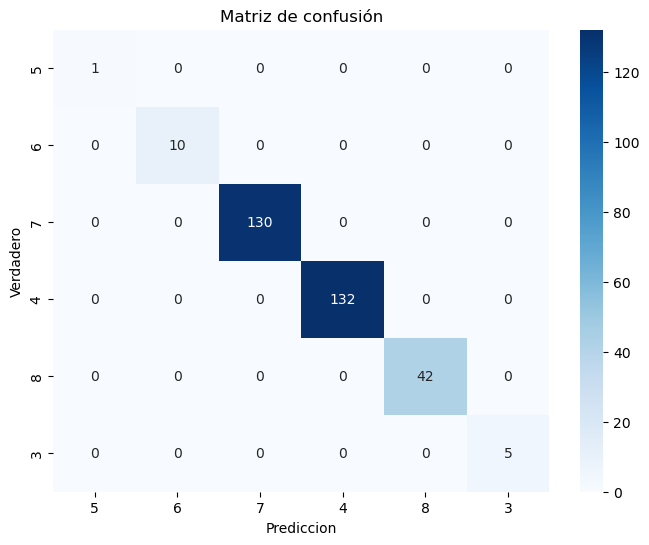

In [269]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Prediccion")
plt.ylabel("Verdadero")
plt.title("Matriz de confusión")
plt.show()

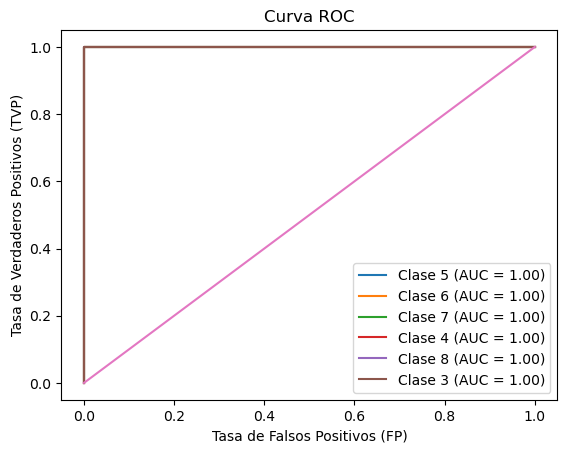

In [281]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarizar las etiquetas si es una clasificación multiclase
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
model_bin = OneVsRestClassifier(best_model)
y_pred_proba = model_bin.fit(X_train, y_train).predict_proba(X_test)

# Calcular el AUC y ROC para cada clase
for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

    plt.plot(fpr, tpr, label=f'Clase {class_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1])
plt.xlabel("Tasa de Falsos Positivos (FP)")
plt.ylabel("Tasa de Verdaderos Positivos (TVP)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()